In [1]:
!pip install finance-datareader
!pip install beautifulsoup4
!pip install xlrd

In [2]:
import FinanceDataReader as fdr 
import matplotlib.pyplot as plt

In [9]:
!pip install lxml

In [11]:
!pip install html_table_parser

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/81.4 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.4 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.4 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.4 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.4 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.4 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.4 kB ? eta -:--:--
     --------------------------------- ---- 71.7/81.4 kB 163.8 kB/s eta 0:00:01
     -------------------------------------- 81.4/81.4 kB 162.4 kB/s eta 0:00:00
  Created wheel for html_table_parser: filename=html_table_parser-0.1.0-py3-none-any.whl size=4638 sha256=4d8e04ff0df005263a3fcead9d90e2c4b1c2833d209e6236a1fd9b88202334ca
  Stored in directory: c:\users\lg\appdata\local\pip\cach

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.33 requires beautifulsoup4>=4.11.1, but you have beautifulsoup4 4.4.1 which is incompatible.


In [2]:
import yfinance as yf

# Replace '^SPGSCI' with the desired stock symbol
ticker = '^SPGSCI'

# Fetch historical data
historical_data = yf.download(ticker, start='2000-01-01', end='2023-01-31',interval='1mo')

# Display the historical data
print(historical_data)


[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2000-01-01  194.220001  209.000000  188.550003  206.369995  206.369995       0
2000-02-01  209.339996  216.009995  205.600006  216.009995  216.009995       0
2000-03-01  222.509995  230.399994  203.919998  206.880005  206.880005       0
2000-04-01  204.679993  205.009995  193.100006  203.210007  203.210007       0
2000-05-01  205.460007  229.020004  205.460007  223.199997  223.199997       0
...                ...         ...         ...         ...         ...     ...
2022-09-01  665.929993  665.929993  591.820007  607.760010  607.760010       0
2022-10-01  607.760010  671.469971  607.760010  636.840027  636.840027       0
2022-11-01  636.840027  671.090027  591.070007  621.109985  621.109985       0
2022-12-01  621.109985  632.359985  568.909973  610.070007  61

In [3]:
import pandas as pd
SP500_GSCI_Index = pd.DataFrame(historical_data)

In [4]:
GSCI = SP500_GSCI_Index[['Adj Close']]
GSCI

,Adj Close
Date,
2000-01-01,206.369995
2000-02-01,216.009995
2000-03-01,206.880005
2000-04-01,203.210007
2000-05-01,223.199997
...,...
2022-09-01,607.760010
2022-10-01,636.840027
2022-11-01,621.109985


In [1]:
import pandas as pd 
import yfinance as yf 
import pymysql
from sqlalchemy import create_engine

#### 주식
- 미국주식 
    - S&P500 지수: ^GSPC
    - NASDAQ 지수: ^IXIC
    - Russell 2000 지수 : ^RUT
- 한국주식
    - KOSPI 지수 : ^KS11

#### 채권
- 미국채
    - 국채수익률 5년물 : ^FVX
    - 국채수익률 10년물 : ^TNX
- 미국 회사채 (보류)
        - IG
        - HY
- 한국채
    - 국고채 1년 
    - 국고채 5년

#### 원자재 
- 금 선물 : GC=F
- 원유 선물 : CL=F
- 원자재/에너지 지수: S&P GSCI Energy Index (^SPGSEN)

In [15]:
tickers= [
    '^GSPC', #s&p500 미국 주식인덱스 지수
    '^RUT', #Russell2000 지수
    # '^KS11', #kospi 한국 주식인덱스 지수  
    '^TNX', #미국 10년 만기 국채 지수
    '^IRX', #미국 13주 만기 국채 지수
    '^FVX', #미국 5년 만기 국채 지수
    '^TYX', #미국 30년 만기 국채 지수
    '^SPGSCI' #미국 s&p500 원자재 지수 
]

all_data = {}
for ticker in tickers:
    all_data[ticker] = yf.download(ticker, start='2000-01-01', end='2019-12-31')

prices = pd.DataFrame(
    {tic: data['Adj Close']
     for tic, data in all_data.items()})

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [16]:
prices.head()

,^GSPC,^RUT,^TNX,^IRX,^FVX,^TYX,^SPGSCI
Date,,,,,,,
2000-01-03,1455.219971,496.420013,6.548,5.27,6.457,6.598,194.220001
2000-01-04,1399.420044,478.380005,6.485,5.27,6.396,6.532,192.369995
2000-01-05,1402.109985,478.829987,6.599,5.27,6.489,6.631,190.520004
2000-01-06,1403.449951,475.339996,6.549,5.24,6.450,6.572,190.419998
2000-01-07,1441.469971,488.309998,6.504,5.22,6.397,6.537,188.550003


In [17]:
prices.tail()

,^GSPC,^RUT,^TNX,^IRX,^FVX,^TYX,^SPGSCI
Date,,,,,,,
2019-12-23,3224.010010,1674.140015,1.935,1.520,1.754,2.363,433.040009
2019-12-24,3223.379883,1678.010010,1.910,1.538,1.724,2.339,435.989990
2019-12-26,3239.909912,1677.670044,1.905,1.535,1.725,2.337,439.700012
2019-12-27,3240.020020,1669.030029,1.874,1.518,1.678,2.311,440.269989
2019-12-30,3221.290039,1664.150024,1.895,1.490,1.681,2.343,439.579987


In [18]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5030 entries, 2000-01-03 to 2019-12-30
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ^GSPC    5030 non-null   float64
 1   ^RUT     5030 non-null   float64
 2   ^TNX     5023 non-null   float64
 3   ^IRX     5023 non-null   float64
 4   ^FVX     5023 non-null   float64
 5   ^TYX     5023 non-null   float64
 6   ^SPGSCI  5030 non-null   float64
dtypes: float64(7)
memory usage: 314.4 KB


In [19]:
prices.isna().sum()

^GSPC      0
^RUT       0
^TNX       7
^IRX       7
^FVX       7
^TYX       7
^SPGSCI    0
dtype: int64

In [6]:
missing_locations = prices[prices.isna().any(axis=1)]

In [12]:
missing_locations['^GSPC'][missing_locations['^GSPC'].isna()]

Date
2000-01-17   NaN
2000-02-21   NaN
2000-04-21   NaN
2000-05-29   NaN
2000-07-04   NaN
              ..
2019-04-19   NaN
2019-05-27   NaN
2019-07-04   NaN
2019-09-02   NaN
2019-11-28   NaN
Name: ^GSPC, Length: 153, dtype: float64

In [42]:
prices['^KS11'].fillna(method='bfill', inplace=True)

In [43]:
prices['^KS11']

Date
2000-01-03    1059.040039
2000-01-04    1059.040039
2000-01-05     986.309998
2000-01-06     960.789978
2000-01-07     948.650024
                 ...     
2019-12-23    2203.709961
2019-12-24    2190.080078
2019-12-26    2197.929932
2019-12-27    2204.209961
2019-12-30    2197.669922
Name: ^KS11, Length: 5183, dtype: float64

In [44]:
prices.isna().sum()

^GSPC      153
^RUT       153
^KS11        0
^TNX       160
^IRX       160
^FVX       160
^TYX       160
^SPGSCI    153
dtype: int64

In [20]:
prices['^GSPC'].fillna(method='bfill', inplace=True)
prices['^RUT'].fillna(method='bfill', inplace=True)
prices['^TNX'].fillna(method='bfill', inplace=True)
prices['^IRX'].fillna(method='bfill', inplace=True)
prices['^FVX'].fillna(method='bfill', inplace=True)
prices['^TYX'].fillna(method='bfill', inplace=True)
prices['^SPGSCI'].fillna(method='bfill', inplace=True)

In [21]:
prices.isna().sum()

^GSPC      0
^RUT       0
^TNX       0
^IRX       0
^FVX       0
^TYX       0
^SPGSCI    0
dtype: int64

In [22]:
rets = prices.pct_change(1).dropna()
rets.tail().round(4)

,^GSPC,^RUT,^TNX,^IRX,^FVX,^TYX,^SPGSCI
Date,,,,,,,
2019-12-23,0.0009,0.0013,0.0094,-0.0052,0.0145,0.0072,-0.0006
2019-12-24,-0.0002,0.0023,-0.0129,0.0118,-0.0171,-0.0102,0.0068
2019-12-26,0.0051,-0.0002,-0.0026,-0.0020,0.0006,-0.0009,0.0085
2019-12-27,0.0000,-0.0052,-0.0163,-0.0111,-0.0272,-0.0111,0.0013
2019-12-30,-0.0058,-0.0029,0.0112,-0.0184,0.0018,0.0138,-0.0016


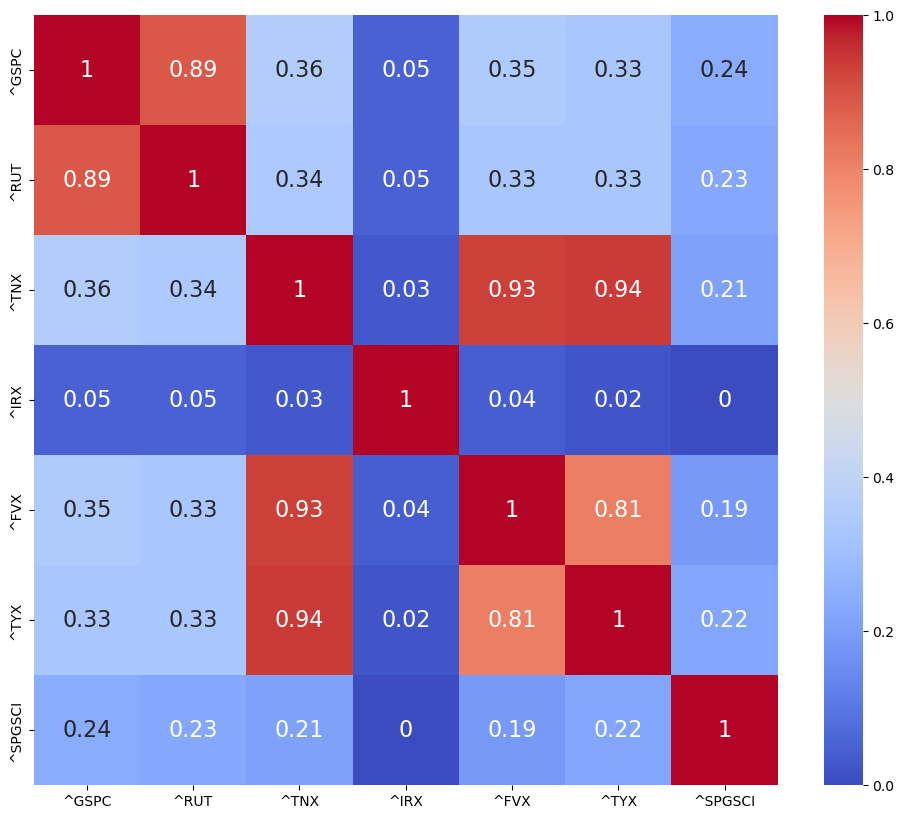

In [23]:
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(12,10))
sns.heatmap(rets.corr().round(2), annot=True, annot_kws={'size':16}, cmap='coolwarm')
plt.show()

#### 최대 샤프지수 포트폴리오
- 샤프지수가 최대가 되도록 하는 포트폴리오
- 샤프지수는 포트폴리오의 수익을 변동서으로 나눈 값
- 위험 대비 수익률
- 샤프 지수가 최대가 되는 포트폴리오는 위험이 낮으면서 수익은 높은 지점을 의미함
- 포트폴리오 구성을 위한 자산별 투자비중 구하기

In [24]:
import riskfolio as rp

In [25]:
#포트폴리오 객체 생성
port = rp.Portfolio(returns=rets)

#입력값 계산
method_mu = 'hist' #역사적 데이터 바탕으로 기대수익률 추정
method_cov = 'hist' #역사적 데이터 바탕으로 분산, 공분산 행렬 추정

#객체에 수익률 및 분산, 공분산 입력
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

model = 'Classic' #모델 입력, Class:역사적 데이터, BL: 블랙 리터만, FM(팩터모형)
rm = 'MV' #위험측정방법 MV: 표준편차를 의미
obj = 'Sharpe' #목적함수, MinRisk(최소분산) MaxRet(최대수익률), utility(효용), Sharpe(샤프지수)
hist = True #역사적 데이터 사용
rf = 0 #무위험수익률
l = 0 #위험회피계수

#최적화
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

round(w.T, 4)

,^GSPC,^RUT,^TNX,^IRX,^FVX,^TYX,^SPGSCI
weights,0.0,0.4696,0.0,0.0817,0.0,0.0,0.4487


In [26]:
points = 50 #효율적 투자선을 구성하는 샘플 개수
frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
frontier.T.head().round(4)

,^GSPC,^RUT,^TNX,^IRX,^FVX,^TYX,^SPGSCI
0,0.4518,0.0000,0.0,0.0000,0.0,0.2632,0.2850
1,0.3849,0.1569,0.0,0.0336,0.0,0.0000,0.4246
2,0.0422,0.4394,0.0,0.0555,0.0,0.0000,0.4629
3,0.0000,0.4706,0.0,0.0768,0.0,0.0000,0.4526
4,0.0000,0.4666,0.0,0.0977,0.0,0.0000,0.4358


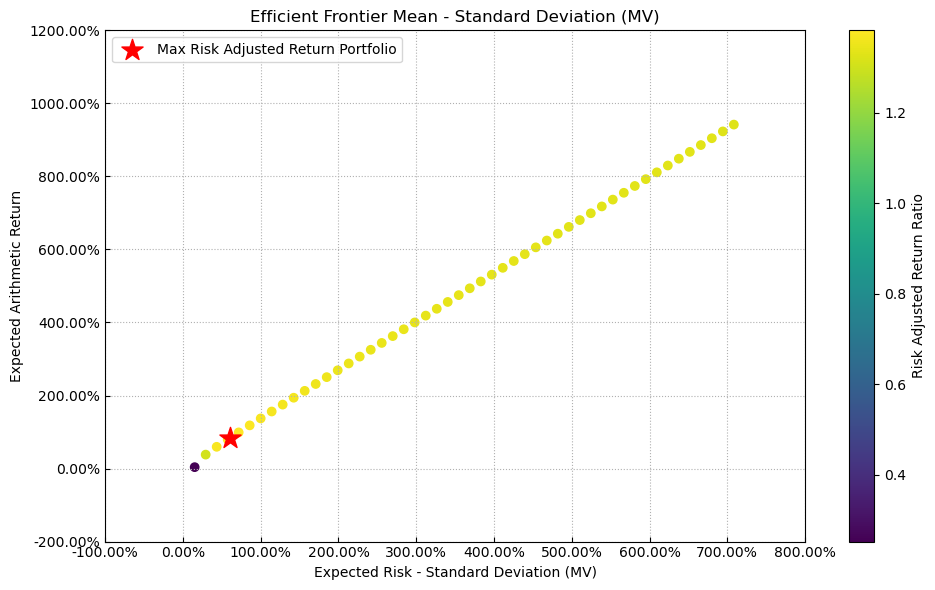

In [27]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu  #기대수익률 
cov = port.cov #분산-공분산 행렬 
returns = port.returns #자산별 수익률

ax = rp.plot_frontier(w_frontier=frontier,
                      mu=mu, 
                      cov=cov,
                      returns=returns, 
                      rm=rm,
                      rf=rf,
                      alpha=0.05,
                      cmap='viridis',
                      w=w,
                      label=label, 
                      marker='*',
                      s=16,
                      c='r',
                      height=6,
                      width=10,
                      ax=None)

#### 최소분산포트폴리오
- 최대샤프지수포트폴리오는 실무에서 잘 사용 x
- 변동성 및 상관관계는 시간이 지나도 어느 정도 유지되는 경향
- 기대수익률을 추정하는 것은 매우 어려움, 이론에서는 과거 수익률을 미래 수익률의 예측치로 사용, 실제 투자에서 사용하기에는 무리가 있음
- 상관관계가 높은 자산이 있으면 하나에만 투자하는 결과를 낳음, 그러나 현실에서는 상관관계가 높은 자산에도 투자해야하는 경우가 많음

In [28]:
port = rp.Portfolio(returns=rets)
method_mu = 'hist'
method_cov = 'hist'
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

model='Classic'
rm = 'MV'
obj = 'MinRisk'
hist = True
rf = 0
l = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

round(w.T, 4)

,^GSPC,^RUT,^TNX,^IRX,^FVX,^TYX,^SPGSCI
weights,0.4518,0.0,0.0,0.0,0.0,0.2632,0.285


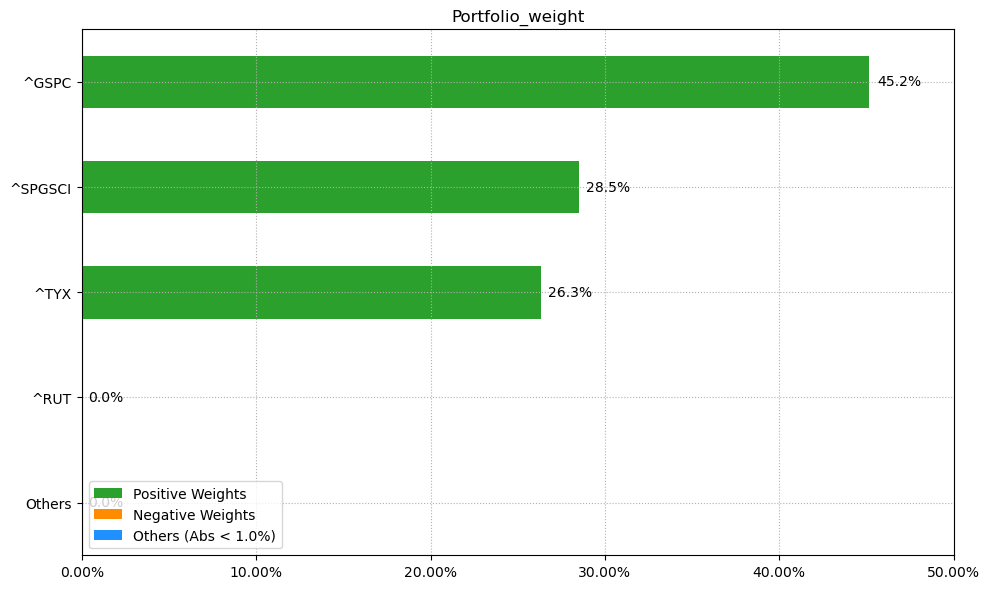

In [29]:
ax = rp.plot_bar(w=w, title='Portfolio_weight', kind='h', ax=None)

In [30]:
asset_classes = {
    'Asset':
    ['^GSPC', #s&p500 미국 주식인덱스 지수
    '^RUT', #Russell2000 지수
    # '^KS11', #kospi 한국 주식인덱스 지수  
    '^TNX', #미국 10년 만기 국채 지수
    '^IRX', #미국 13주 만기 국채 지수
    '^FVX', #미국 5년 만기 국채 지수
    '^TYX', #미국 30년 만기 국채 지수
    '^SPGSCI'], #미국 원자재지수
     'Class':
      ['stock_index','stock_index','bond_index','bond_index','bond_index','bond_index','alternative_index'] #미국 s&p500 원자재 지수 
}

asset_classes = pd.DataFrame(asset_classes)
asset_classes

,Asset,Class
0,^GSPC,stock_index
1,^RUT,stock_index
2,^TNX,bond_index
3,^IRX,bond_index
4,^FVX,bond_index
5,^TYX,bond_index
6,^SPGSCI,alternative_index


#### 제약조건 만들기
- ex. 최소 투자비중 5%
- ex. 최대 투자비중 20% 가정

In [34]:
constraints = {'Disabled':[False, False],
               'Type':['All Assets', 'All Assets'],
               'Set':['',''],
               'Position':['',''],
               'Sign':['>=','<='],
               'Weight':[0.05, 1],
               'Type Relative':['',''],
               'Relative Set':['',''],
               'Relative':['',''],
               'Factor':['','']}
constraints = pd.DataFrame(constraints)
constraints

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,>=,0.05,,,,
1,False,All Assets,,,<=,1.00,,,,


In [35]:
#최적해 구하기
A, B = rp.assets_constraints(constraints, asset_classes)

port.ainequality = A
port.binequality = B

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, hist=hist)

w.T

,^GSPC,^RUT,^TNX,^IRX,^FVX,^TYX,^SPGSCI
weights,0.333569,0.05,0.05,0.05,0.05,0.130434,0.335997


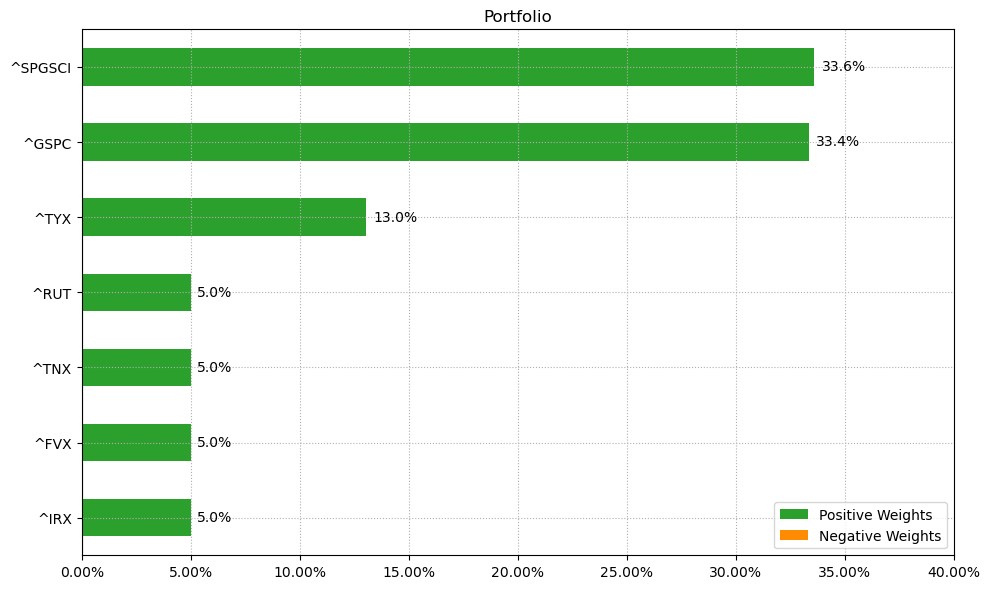

In [36]:
ax = rp.plot_bar(w=w, title='Portfolio', kind='h', ax=None)